In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data.csv')
clients = pd.read_csv('cliente_tabla.csv')
products = pd.read_csv('producto_tabla.csv')
towns = pd.read_csv('town_state.csv')
data

,Unnamed: 0,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima
0,0,3,1111,1,1001,50827,73,6,127.92,0,0.0
1,1,3,1111,1,1001,50827,693,5,48.00,0,0.0
2,2,3,1111,1,1001,50827,1109,21,315.21,0,0.0
3,3,3,1111,1,1001,50827,1125,37,355.20,0,0.0
4,4,3,1111,1,1001,50827,1129,12,211.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
462735,462735,9,25759,1,900,4686785,46876,16,78.88,0,0.0
462736,462736,9,25759,1,900,4686785,48419,96,176.72,0,0.0
462737,462737,9,25759,1,900,4686785,48577,22,57.42,0,0.0
462738,462738,9,25759,1,900,4686785,48578,7,18.27,0,0.0


In [6]:
#clients = clients.drop('NombreCliente',axis=1)
clients = clients.drop_duplicates(subset='Cliente_ID', keep='first', inplace=False)

In [7]:
client_data = pd.merge(data, clients, how='left', on='Cliente_ID')
product_data = pd.merge(client_data, products, how='left', on='Producto_ID')
all_data = pd.merge(product_data, towns, how='left', on='Agencia_ID')
english_data = all_data.rename(columns={"Semana" : "Week#", "Ruta_SAK":"Route_ID", "Venta_uni_hoy" : "Sales(units)", "Venta_hoy" : "Sales(pesos)", "Dev_uni_proxima" : "Returns(units)", "Dev_proxima" : "Returns(pesos)", "NombreProducto" : "Product_Name"})

In [8]:
demand = english_data['Sales(units)'] - english_data['Returns(units)']
english_data['Demand'] = demand
english_data.head()

,Unnamed: 0,Week#,Agencia_ID,Canal_ID,Route_ID,Cliente_ID,Producto_ID,Sales(units),Sales(pesos),Returns(units),Returns(pesos),NombreCliente,Product_Name,Town,State,Demand
0,0,3,1111,1,1001,50827,73,6,127.92,0,0.0,NANCY,Pan Multigrano Linaza 540g BIM 73,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",6
1,1,3,1111,1,1001,50827,693,5,48.00,0,0.0,NANCY,Tostada Plana 15p 175g MR 693,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",5
2,2,3,1111,1,1001,50827,1109,21,315.21,0,0.0,NANCY,Pan Blanco Chico 360g BIM 1109,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",21
3,3,3,1111,1,1001,50827,1125,37,355.20,0,0.0,NANCY,Tortillinas 10p 255g TR 1125,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",37
4,4,3,1111,1,1001,50827,1129,12,211.20,0,0.0,NANCY,Tortillinas 20p 510g TR 1129,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",12


In [9]:
##Organizing data by week to see if there were any extreme outliers
by_week = english_data[['Week#','Demand']]
by_week = by_week.groupby('Week#')
by_week.sum()

,Demand
Week#,
3,4963757
4,5195646
5,4993305
6,4653883
7,4863171
8,4810198
9,4633484


In [10]:
by_route = english_data[['Route_ID','Demand']]
by_route = by_route.groupby('Route_ID')
route_avg = by_route.mean().sort_values(by='Demand', ascending=False)
route_avg.mean()

Demand    53.11012
dtype: float64

In [11]:
by_route.mean().min()
#no route has a negative demand, meaning no route is detrimental to the company's value 

Demand    2.25
dtype: float64

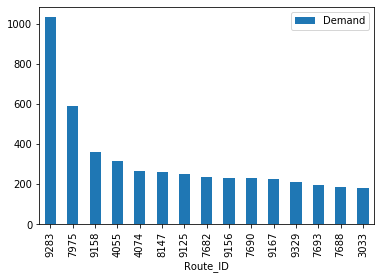

In [12]:
route_avg.iloc[0:15].plot.bar()

In [13]:
english_data[english_data['Route_ID']==1001]

,Unnamed: 0,Week#,Agencia_ID,Canal_ID,Route_ID,Cliente_ID,Producto_ID,Sales(units),Sales(pesos),Returns(units),Returns(pesos),NombreCliente,Product_Name,Town,State,Demand
0,0,3,1111,1,1001,50827,73,6,127.92,0,0.0,NANCY,Pan Multigrano Linaza 540g BIM 73,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",6
1,1,3,1111,1,1001,50827,693,5,48.00,0,0.0,NANCY,Tostada Plana 15p 175g MR 693,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",5
2,2,3,1111,1,1001,50827,1109,21,315.21,0,0.0,NANCY,Pan Blanco Chico 360g BIM 1109,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",21
3,3,3,1111,1,1001,50827,1125,37,355.20,0,0.0,NANCY,Tortillinas 10p 255g TR 1125,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",37
4,4,3,1111,1,1001,50827,1129,12,211.20,0,0.0,NANCY,Tortillinas 20p 510g TR 1129,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447247,447247,9,2235,1,1001,51822,31184,20,333.20,0,0.0,SUPER DE LA 35,Tostada Clasica 216g CJM SAN 31184,2384 CIUDAD DEL CARMEN,CAMPECHE,20
447248,447248,9,2235,1,1001,51822,31392,25,555.50,0,0.0,SUPER DE LA 35,Pan Doble Fibra 640g BIM 31392,2384 CIUDAD DEL CARMEN,CAMPECHE,25
447249,447249,9,2235,1,1001,51822,35727,34,326.40,0,0.0,SUPER DE LA 35,Tortillina 50pct menos Grasa 328g TR 35727,2384 CIUDAD DEL CARMEN,CAMPECHE,34
447250,447250,9,2235,1,1001,51822,46772,92,820.64,0,0.0,SUPER DE LA 35,Pan Molido 210g BIM 46772,2384 CIUDAD DEL CARMEN,CAMPECHE,92


In [11]:
by_agent = english_data[['Agencia_ID','Demand']]
by_agent = by_agent.groupby('Agencia_ID')
agent_avg = by_agent.mean().sort_values(by='Demand', ascending=False)
agent_avg.head(25)

,Demand
Agencia_ID,
1564,263.995708
1653,204.688635
2212,195.678097
1650,193.402736
2058,185.307692
2255,185.034836
1981,184.463768
2231,183.890518
1273,178.878154


In [12]:
by_client = english_data[['Cliente_ID','Demand','Returns(units)']]
by_client = by_client.groupby('Cliente_ID')
by_client.mean().sort_values(by='Demand',ascending=True)

,Demand,Returns(units)
Cliente_ID,,
653058,-11.296399,17.486611
652940,-9.077526,9.080139
652889,-7.181481,10.958025
625491,-6.800162,9.653722
1023996,-0.598958,15.065972
...,...,...
653039,168.305503,3.136449
653037,169.752856,8.581516
19174,169.861413,0.236413


In [14]:
##last relationship to check was product
by_product = english_data[['Product_Name', 'Sales(units)', 'Returns(units)', 'Demand']]
# new data frame with split value columns 
new = by_product["Product_Name"].str.split(" ", n = 2, expand = True) 
  
# making separate product column from new data frame 
# did this to separate out the various grams/ml, pack sizes, and 4 digit codes at the end of similiar products
by_product["Product_Name"] = new[0] + new[1] 

  
# Grouping each product with similar names to find average unit surplus
by_product = by_product.groupby('Product_Name')
by_product = by_product.mean().sort_values(by='Demand')
zero_returns = by_product[by_product['Returns(units)'] == 0]
unpopular_goods = by_product[by_product['Demand'] < 0]

C:\Users\dixon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


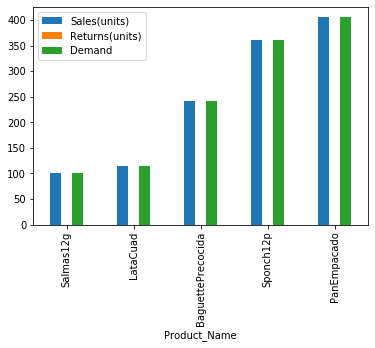

In [15]:
zero_returns.sort_values(by='Sales(units)', ascending=False)
zero_returns.iloc[-5:].plot.bar()

In [16]:
unpopular_goods

,Sales(units),Returns(units),Demand
Product_Name,,,
Paletinapara,0.000000,250000.000000,-250000.000000
MenthoPlus,66.666667,207.666667,-141.000000
MiniGansito,66.125000,146.750000,-80.625000
ComboTost,0.000000,44.000000,-44.000000
StarGumYerbabuena,0.000000,21.666667,-21.666667
DuoPlativolos,3.178571,20.130952,-16.952381
Spirrones25g,13.800000,23.800000,-10.000000
BolsitaSurtido,0.000000,8.000000,-8.000000
MaxTwo,0.000000,7.000000,-7.000000


In [17]:
by_product

,Sales(units),Returns(units),Demand
Product_Name,,,
Paletinapara,0.000000,250000.000000,-250000.000000
MenthoPlus,66.666667,207.666667,-141.000000
MiniGansito,66.125000,146.750000,-80.625000
ComboTost,0.000000,44.000000,-44.000000
StarGumYerbabuena,0.000000,21.666667,-21.666667
...,...,...,...
Tortillinas22p,294.960613,1.358133,293.602480
Sponch12p,362.000000,0.000000,362.000000
PanEmpacado,405.600000,0.000000,405.600000


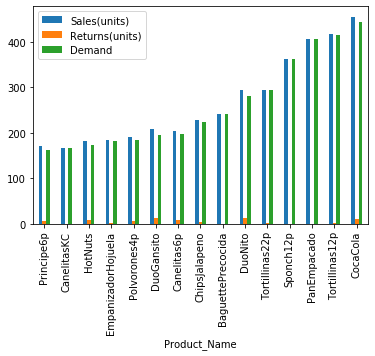

In [18]:
by_product.iloc[-15:].plot.bar()